# Pregunta 1
Carrega el dataset i mostra les primeres 5 files.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

price_data = pd.read_csv('laptop_prices.csv')

price_data.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


# Pregunta 2

Falten dades al dataset. A quina columna?

In [72]:
price_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       995 non-null    float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


# Pregunta 3
Substitueix els valors faltant per la mitjana de les dades de la mateixa marca. Comprova que després de fer-ho no falten valors.

In [73]:
price_data['Screen_Size'] = price_data.groupby('Brand')['Screen_Size'].transform(lambda x: x.fillna(x.mean()))

price_data['Screen_Size'].isnull().sum()

np.int64(0)

# Pregunta 4
Que faries si en alguna dada li falta la marca?

In [74]:
price_data.assign()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
...,...,...,...,...,...,...,...
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459
999,Lenovo,1.711980,4,256,16.561498,3.440883,8807.696702


# Pregunta 5
Mostra amb un gràfic quants elements hi han de cadascuna de les marques al dataset.

<Axes: ylabel='Brand'>

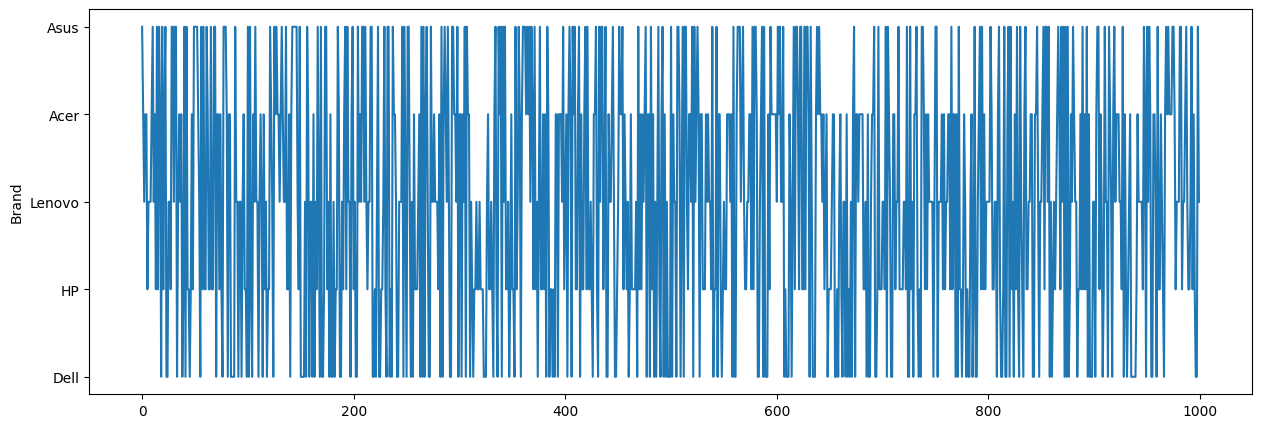

In [75]:
plt.figure(figsize=(15,5))
sns.lineplot(data=price_data['Brand'])

# Pregunta 6
Està compensat el dataset?

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64


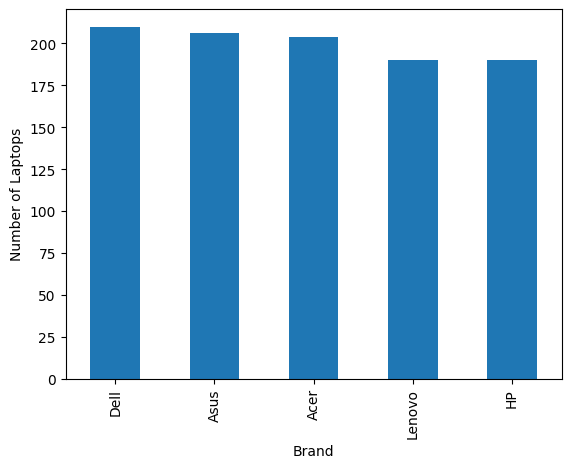

In [76]:
categoria_counts = price_data['Brand'].value_counts()

print(categoria_counts)

categoria_counts.plot(kind='bar')

plt.xlabel('Brand')
plt.ylabel('Number of Laptops')
plt.show()

# Relacions entre variables
Anem a estudiar si hi ha una relació entre algunes característiques i el preu. Mostra un gràfic de dispersió entre les variables potència del processador, RAM, disc dur i pes amb el preu.

Volem dibuixa-ho en 4 gràfics que es visualitzen alhora, en una graella de dos files i dos columnes, però com a bons programadors ho farem per parts

# Pregunta 7
Crea una funció que es diga `dibuixa_relacio_amb_target`:
  - Ha de rebre com a arguments un dataframe, i el nom de dos variables, i representarà un gràfic de dispersió entre eixes dos columnes del dataframe. L'últim argument de la funció deu ser el ax (gràfice) on el dibuixarà, sent `None` per defecte

  > Prova la crida amb `dibuixa_relacio_amb_target(price_data,'Weight','Price')`

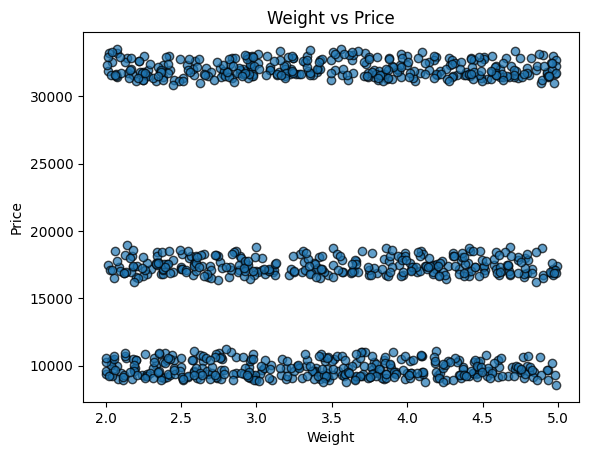

In [80]:
def dibuixa_relacio_amb_target(dataframe, var_x, var_y, ax=None):
    if ax is None:
        ax = plt.gca()
        ax.scatter(dataframe[var_x], dataframe[var_y], alpha=0.7, edgecolors='k')
    ax.set_xlabel(var_x)
    ax.set_ylabel(var_y)
    ax.set_title(f"{var_x} vs {var_y}")
    return ax

try:
    dibuixa_relacio_amb_target(price_data,'Weight','Price')
    plt.show()
except Exception as e:
    print(f"Error dibuixant la gràfica: {e}")

# Pregunta 8
Donades les següents variables, fes un bloc de codi que genere la grafica amb els 4 diagrames de dispersió, dins d'una mateixa figura.
```
dades=['Processor_Speed','RAM_Size','Storage_Capacity','Weight']
objectiu='Price'
```

> **TIP**: Crea subfigures, i pássa-li a la funció anterior en cada ax una figura

# Pregunta 9
Ara volem relacionar tres variables en un gràfic 2D. Dibuixa la relació preu-velocitat del processador diferenciant cada representació segons la capacitat del disc en un gràfic adequat.

# Fem prediccions

Volem definir un model d'IA per a predir el preu d'un portàtil donades les seues característiques.

# Pregunta 10
Comencem per arreglar les nostres dades per poder passar-li'l a un algorisme de ML.

# Pregunta 11
Divideix les dades en dades d'entrada i dades objectiu.

# Pregunta 12
Divideix les dades en dos blocs, entrenament (80%) i validació(20%) amb una llavor d'1.

# Pregunta 13
Entrena un GradientBoostingRegressor sense hiperparàmetres i imprimeix els errors de validació i d'entrenamet. Quin és major? Perquè?

# Pregunta 14

Un dels hiperparàmetres que podem passar-li a l'algorisme és `loss` (funció de pèrdua que volem utilitzar), un altre és `n_estimators` (arbres utilitzats) i un altre el `learning_rate` (pes de cada arbre en el model final).

El nombre d'estimadors òptims creiem que estarà entre 30 i 120. 

Representa gràficament les corbes d'aprenentatge en variar el model entre estos valors (evolució de l'error absolut tant en les dades d'entrenament com de validació). Fes-ho definint una funció que reba les x i les y tant d'entrenament com de validació i faça un gràfic adequat.

La funció de pèrdua per al model serà `absolute_error`. 

In [ ]:
# Funció

In [ ]:
# Gràfic

# Pregunta 15
Comenta el gràfic obtingut. S'observa underfitting o overfitting? Podem estimar el valor òptim amb el gràfic?

# Pregunta 16
Extrau de les dades que hem obtingut el nombre òptim d'estimadors i l'error associat.

# Pregunta 17
Anem a repetir el procés, esta vegada amb el `learning_rate`.

L'òptim es situarà entre els valors 2 i 0.001. Dibuixa les corbes d'aprenentatge per a eixe rang amb 40 divisions.

# Pregunta 18
Comenta el gràfic obtingut. S'observa underfitting o overfitting? Podem estimar el valor òptim amb el gràfic?

# Pregunta 19
Extrau de les dades que hem obtingut el nombre òptim de taxa d'aprenentatge i l'error associat.

# Pregunta 20
Defineix un model amb els paràmetyres òptims que has calculat i la funció de pèrdua error absolut. Calcula el MAE. Has obtés el millor MAE? Perquè?

# Pregunta 21
Per trobar els millors paràmetres pots utilitzar el `GridSearchCV`. Buscant com a 'learning_rate'entre 0.3 i 0.001 i entre 85 i 100 estimadors.

Per llevar aleatorietat definirem la llavor a 1.

Tingues en compte que esta tècnica pot tardar, defineix 10 particions per al learning rate.

# Pregunta 22
Defineix el model òptim amb els millors paràmetres i calcula l'error en les prediccions. Has obtés el millor resultat? Perquè?

# Pregunta 23
L'error que hem obtés en l'estimació és gran o menut? Justifica la resposta.